# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading Dataset and Data Preprocessing

In [2]:
titanic_dataset = pd.read_csv("Titanic-Dataset.csv")
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_dataset.shape

(891, 12)

In [5]:
# Checking for Null/missing  Values in each column of the dataset

titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# it is seen above that the Age colum of the dataset has 177 missing values out of the 891
# filling the Age column missing values with the mean of the column

# function to calculate the mean of the Age column
def cal_column_mean(dataset, column_name):
    print("checking for column availability.......")
    if column_name not in dataset.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the dataset.")
    else:
        print("column found")
        print("Calculating the mean of the ", column_name, "column")
    mean_value = dataset[column_name].mean()
    return mean_value


Age_mean = cal_column_mean(titanic_dataset, "Age")
print("Mean of the Age column is :  ", Age_mean)

checking for column availability.......
column found
Calculating the mean of the  Age column
Mean of the Age column is :   29.69911764705882


In [7]:
titanic_dataset['Age'].fillna(Age_mean, inplace=True)

titanic_dataset.head(20)

C:\Users\olami\AppData\Local\Temp\ipykernel_7728\2024726118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset['Age'].fillna(Age_mean, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [8]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Drop 'Cabin' colmun due to many missing values
titanic_dataset.drop(columns=['Cabin'], inplace=True)

In [10]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
# filling the Embarked coumn missing values with the mode of the column

titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0], inplace=True)
titanic_dataset.isnull().sum()

C:\Users\olami\AppData\Local\Temp\ipykernel_7728\601013474.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0], inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Visualization using matplotlib and seaborn

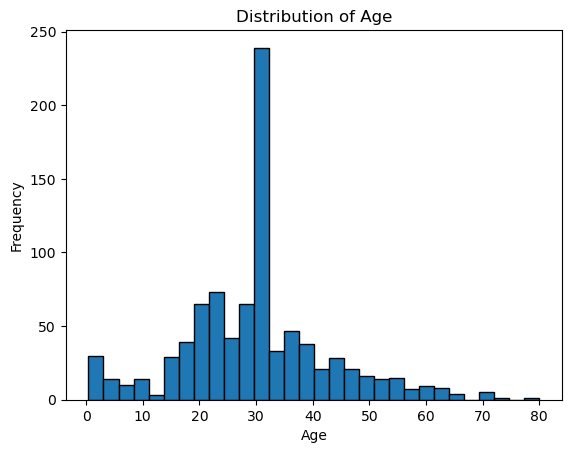

In [13]:
# Histogram of Age
plt.hist(titanic_dataset['Age'], bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

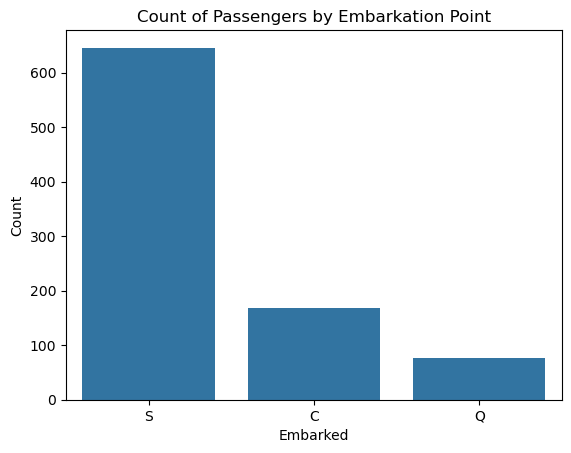

In [14]:
# Bar plot of Embarked
sns.countplot(x='Embarked', data=titanic_dataset)
plt.title('Count of Passengers by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

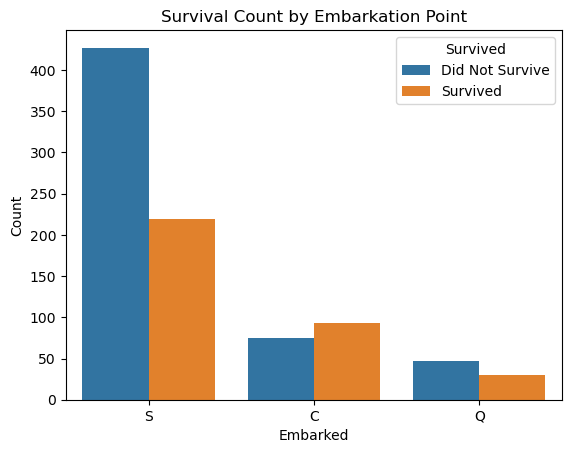

In [15]:
# Bar plot of survival count by embarkation point
sns.countplot(x='Embarked', hue='Survived', data=titanic_dataset)
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Did Not Survive', 'Survived'])
plt.show()


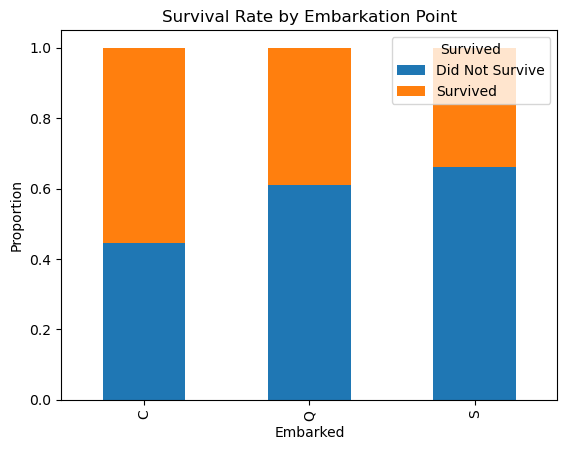

In [16]:
# Calculating the survival rate for each embarkation point
embarked_survival = titanic_dataset.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack()

# Plot survival rate by embarkation point
embarked_survival.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right', labels=['Did Not Survive', 'Survived'])
plt.show()


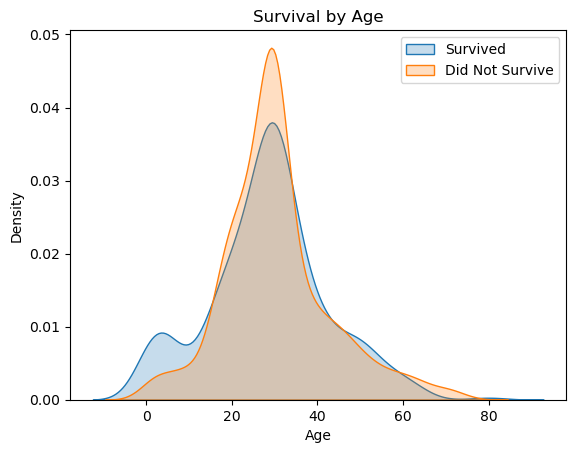

In [17]:
# KDE plot of age distribution for survived and not survived
sns.kdeplot(data=titanic_dataset[titanic_dataset['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(data=titanic_dataset[titanic_dataset['Survived'] == 0]['Age'], label='Did Not Survive', fill=True)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


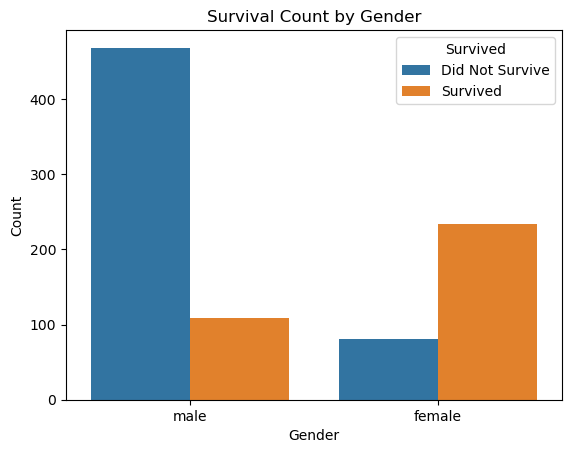

In [18]:
# Bar plot of survival count by gender
sns.countplot(x='Sex', hue='Survived', data=titanic_dataset)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Did Not Survive', 'Survived'])
plt.show()


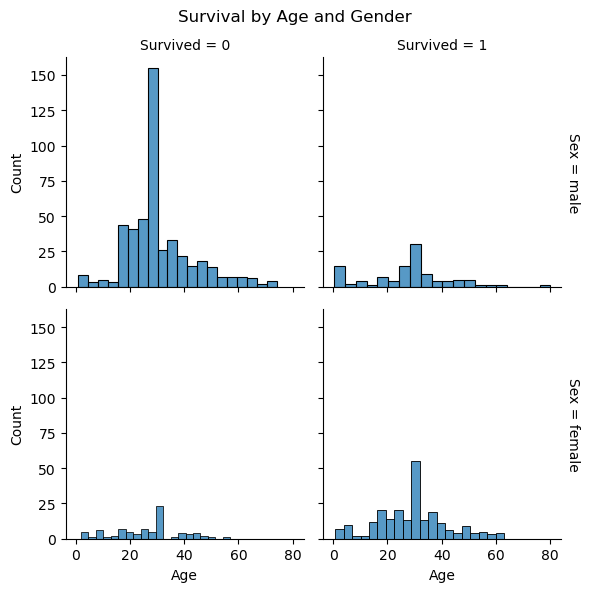

In [19]:
# FacetGrid of age distribution for survived and not survived by gender
g = sns.FacetGrid(titanic_dataset, col='Survived', row='Sex', margin_titles=True)
g.map(sns.histplot, 'Age', bins=20, kde=False)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Survival by Age and Gender')
plt.show()

In [20]:

def plot_facet_grid(titanic_dataset):
    g = sns.FacetGrid(titanic_dataset, col="Survived", row="Sex", margin_titles=True, height=4)
    g.map_dataframe(sns.histplot, x="Age", kde=True)
    g.set_axis_labels("Age", "Count")
    g.set_titles(col_template="{col_name} Survived", row_template="{row_name}")
    plt.show()

In [21]:
def plot_bar(titanic_dataset):
    survival_rate_gender = titanic_dataset.groupby('Sex')['Survived'].mean().reset_index()
    sns.barplot(data=survival_rate_gender, x='Sex', y='Survived')
    plt.title('Survival Rate by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Survival Rate')
    plt.ylim(0, 1)
    plt.show()

In [22]:
def plot_violin(titanic_dataset):
    sns.violinplot(data=titanic_dataset, x='Survived', y='Age', hue='Sex', split=True, inner='quart')
    plt.title('Age Distribution by Survival and Gender')
    plt.xlabel('Survived')
    plt.ylabel('Age')
    plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
    plt.show()

In [23]:
def plot_embarked_vs_survival(titanic_dataset):
    sns.countplot(data=titanic_dataset, x='Embarked', hue='Survived')
    plt.title('Survival Count by Embarked Location')
    plt.xlabel('Embarked')
    plt.ylabel('Count')
    plt.show()

In [24]:
def plot_age_and_gender(titanic_dataset):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=titanic_dataset[titanic_dataset['Survived'] == 1]['Age'], label='Survived', fill=True)
    sns.kdeplot(data=titanic_dataset[titanic_dataset['Survived'] == 0]['Age'], label='Did Not Survive', fill=True)
    plt.title('Survival by Age')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [25]:
def visualize_titanic(titanic_dataset):
    plot_options = {
        '1': lambda: plot_facet_grid(titanic_dataset),
        '2': lambda: plot_bar(titanic_dataset),
        '3': lambda: plot_violin(titanic_dataset),
        '4': lambda: plot_embarked_vs_survival(titanic_dataset),
        '5': lambda: plot_age_and_gender(titanic_dataset)
    }

    print("Choose the type of visualization:")
    print("1: FacetGrid for Age Distribution by Survival and Gender")
    print("2: Bar Plot for Survival Rate by Gender")
    print("3: Violin Plot for Age Distribution by Survival and Gender")
    print("4: Embarked vs Survival")
    print("5: Age and Gender Survival Rate")

    choice = input("Enter the number of the visualization you want to see: ")

    if choice in plot_options:
        plot_options[choice]()
    else:
        print("Invalid choice. Please enter a number from 1 to 5.")


Choose the type of visualization:
1: FacetGrid for Age Distribution by Survival and Gender
2: Bar Plot for Survival Rate by Gender
3: Violin Plot for Age Distribution by Survival and Gender
4: Embarked vs Survival
5: Age and Gender Survival Rate


Enter the number of the visualization you want to see:  3


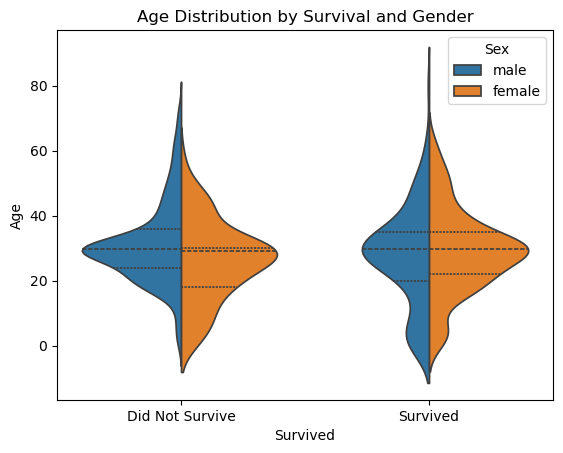

In [26]:
# Assuming 'titanic_dataset' is your cleaned Titanic dataset
visualize_titanic(titanic_dataset)

# Feature Engineering

##### We can extract titles (e.g., Mr, Mrs, Miss) from passenger names as they might provide useful information about the passenger's social status

In [27]:
def extract_title(name):
    if 'Mr.' in name:
        return 'Mr'
    elif 'Mrs.' in name:
        return 'Mrs'
    elif 'Miss.' in name:
        return 'Miss'
    elif 'Master.' in name:
        return 'Master'
    else:
        return 'Other'

titanic_dataset['Title'] = titanic_dataset['Name'].apply(extract_title)

###### Creating a feature to indicate whether the passenger was alone or with family/relatives

In [28]:
titanic_dataset['FamilySize'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1 
titanic_dataset['IsAlone'] = (titanic_dataset['FamilySize'] == 1).astype(int)

###### Creating age groups to simplify age into categorical bins.

In [29]:
bins = [0, 12, 20, 40, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
titanic_dataset['AgeGroup'] = pd.cut(titanic_dataset['Age'], bins=bins, labels=labels)


In [30]:
titanic_dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,2,0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,2,0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,1,1,Adult
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Mr,1,1,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr,1,1,Middle-aged
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Master,5,0,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs,3,0,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs,2,0,Teenager


# Categorical Encoding 

In [31]:
# Converting Categorical Columns 
titanic_dataset.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

C:\Users\olami\AppData\Local\Temp\ipykernel_7728\3867176274.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_dataset.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)


In [32]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=[ 'Title', 'AgeGroup'], drop_first=True)


In [33]:
titanic_dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeGroup_Teenager,AgeGroup_Adult,AgeGroup_Middle-aged,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,...,2,0,False,True,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,...,2,0,False,False,True,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,...,1,1,True,False,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,...,2,0,False,False,True,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,...,1,1,False,True,False,False,False,True,False,False
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,...,1,1,False,True,False,False,False,True,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,...,1,1,False,True,False,False,False,False,True,False
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,...,5,0,False,False,False,False,False,False,False,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,...,3,0,False,False,True,False,False,True,False,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,...,2,0,False,False,True,False,True,False,False,False


# Feature Selection

In [34]:
X = titanic_dataset.drop(columns=["PassengerId", "Name", "Ticket", "Survived"], axis=1)
y = titanic_dataset['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 712 samples
Test set size: 179 samples


In [37]:
# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.7988826815642458
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Logistic Regression Confusion Matrix:
 [[88 17]
 [19 55]]


In [38]:
# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8268156424581006
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Random Forest Confusion Matrix:
 [[91 14]
 [17 57]]


In [39]:
# Hyperparameters for Logistic Regression
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [40]:
# Grid Search for Logistic Regression
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best score for Logistic Regression:", grid_search_log_reg.best_score_)

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)
print("heajfkbrnranbjrb")

Best parameters for Logistic Regression: {'C': 10, 'solver': 'newton-cg'}
Best score for Logistic Regression: 0.8314291342460358
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best score for Random Forest: 0.8313995863291638
heajfkbrnranbjrb


In [41]:
# Train Logistic Regression with best parameters
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test)

print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best_log_reg))
print("Best Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_best_log_reg))
print("Best Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_log_reg))

# Train Random Forest with best parameters
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Best Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


Best Logistic Regression Accuracy: 0.7988826815642458
Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Best Logistic Regression Confusion Matrix:
 [[89 16]
 [20 54]]
Best Random Forest Accuracy: 0.8044692737430168
Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Best Random Forest Confusion Matrix:
 [[92 13]
 [22 52]]


In [42]:
predictions_df = pd.DataFrame({
    'ID': X_test.index,  # Replace with appropriate identifier column if available
    'Predicted': y_pred_best_rf
})

predictions_df.to_csv('predictions.csv', index=False)

In [43]:
joblib.dump(rf, 'random_forest_model.pkl')
print("Model saved successfully!")

Model saved successfully!
